In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import sklearn as sk
from sklearn.model_selection import train_test_split
from sympy.utilities.iterables import multiset_permutations
import itertools
np.set_printoptions(threshold=np.inf)
import tensorflow_datasets as tfds
from tensorflow import keras

**My CNN**

In [3]:
labels = np.load("/content/drive/MyDrive/numeric_labels.npy")
data = np.load("/content/drive/MyDrive/data.npy")

In [4]:
print(labels.shape)
print(data.shape)

(1000, 4)
(1000, 69, 257, 3)


Run this to create the universal set of classes/permutations.

In [7]:
temp = []

for i_1 in range(4):
  for i_2 in range(4):
    for i_3 in range(4):
      for i_4 in range(4):
        temp = np.append(temp, np.array(list(itertools.permutations([i_1 + 1, i_2 + 1, i_3 + 1, i_4 + 1]))))

temp = temp.reshape((-1, 4))

seen = set()
one_hot = []
for item in temp:
     t = tuple(item)
     if t not in seen:
         one_hot.append(item)
         seen.add(t)

one_hot = np.array(one_hot)

In [11]:
print(one_hot.shape)

(256, 4)


In [13]:
oh_labels = np.zeros((data.shape[0], 256))
row_counter = 0

for lab in labels:
  for i in range(256):
    if np.all(lab == one_hot[i,:]):
      oh_labels[row_counter, i] = 1

  row_counter += 1

In [14]:
print(oh_labels.shape)

(1000, 256)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, oh_labels, test_size = 0.2, train_size = 0.8)
X_train = X_train / 255
X_test = X_test / 255

In [20]:
print(X_train.shape)
print(y_train.shape)

(800, 69, 257, 3)
(800, 256)


In [79]:
def generate_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(69, 257, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(256, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [80]:
model = generate_model() 

In [81]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, shuffle = True)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 53.6357 - accuracy: 0.0080
Epoch 2/100
25/25 [==============================] - 0s 11ms/step - loss: 5.5448 - accuracy: 0.0121
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 5.5389 - accuracy: 0.0086
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 5.5613 - accuracy: 0.0181
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 5.5238 - accuracy: 0.0050
Epoch 6/100
25/25 [==============================] - 0s 10ms/step - loss: 5.4854 - accuracy: 0.0100
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 5.4485 - accuracy: 0.0132
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 5.3535 - accuracy: 0.0171
Epoch 9/100
25/25 [==============================] - 0s 10ms/step - loss: 5.2135 - accuracy: 0.0404
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 5.1173 - accuracy: 0.044

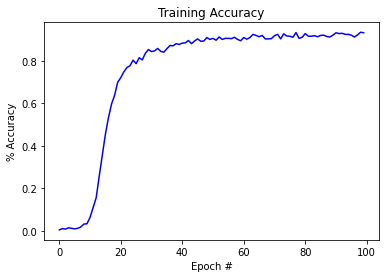

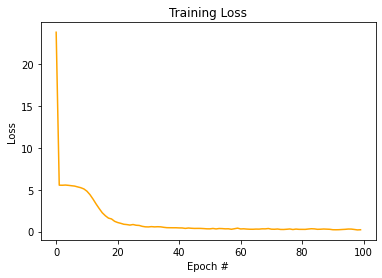

In [82]:
plt.plot(history.history['accuracy'], color = "blue")
plt.title('Training Accuracy')
plt.ylabel('% Accuracy')
plt.xlabel('Epoch #')
plt.show()
plt.plot(history.history['loss'], color = "orange")
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.show()

In [84]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 25.9740 - accuracy: 0.0050


**Transfer Learning (ImageNetV2)** \\
Not fully implemented.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(69, 257, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

In [ ]:
model = tf.keras.Sequential([
                              base_model,
                              global_average_layer,
                              prediction_layer
                            ])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, train_labels, batch_size= 32,epochs=50, shuffle=True)

acc = history.history['accuracy']
print(acc)


In [ ]:
plt.plot(history.history['accuracy'], color = "blue")
plt.title('ImageNetV2 Training Accuracy')
plt.ylabel('% Accuracy')
plt.xlabel('Epoch #')
plt.show()
plt.plot(history.history['loss'], color = "orange")
plt.title('ImageNetV2 Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch #')
plt.show()